In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dataset=pd.read_csv("gerdat.csv",sep=";")

In [7]:
dataset.shape

(1000, 21)

In [8]:
dataset.head()

,Statusofexistingcheckingaccount,Durationinmonth,Credithistory,Purpose,Creditamount,Savingsaccountbonds,Presentemploymentsince,Installmentrateinpercentageofdisposableincome,Personalstatusandsex,Otherdebtors/guarantors,...,Property,Age,Otherinstallmentplans,Housing,Numberofexistingcredits,Job,Numberofpeoplebeingliabletoprovidemaintenancefor,Telephone,foreignworker,Scoring
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2


In [10]:
dataset.isnull().sum()

Statusofexistingcheckingaccount                     0
Durationinmonth                                     0
Credithistory                                       0
Purpose                                             0
Creditamount                                        0
Savingsaccountbonds                                 0
Presentemploymentsince                              0
Installmentrateinpercentageofdisposableincome       0
Personalstatusandsex                                0
Otherdebtors/guarantors                             0
Presentresidencesince                               0
Property                                            0
Age                                                 0
Otherinstallmentplans                               0
Housing                                             0
Numberofexistingcredits                             0
Job                                                 0
Numberofpeoplebeingliabletoprovidemaintenancefor    0
Telephone                   

In [11]:
dataset.duplicated().sum()

0

 ### On remarque qu'on n'a pas de  valeurs  manquantes

In [16]:
dataset.dtypes

Statusofexistingcheckingaccount                     int64
Durationinmonth                                     int64
Credithistory                                       int64
Purpose                                             int64
Creditamount                                        int64
Savingsaccountbonds                                 int64
Presentemploymentsince                              int64
Installmentrateinpercentageofdisposableincome       int64
Personalstatusandsex                                int64
Otherdebtors/guarantors                             int64
Presentresidencesince                               int64
Property                                            int64
Age                                                 int64
Otherinstallmentplans                               int64
Housing                                             int64
Numberofexistingcredits                             int64
Job                                                 int64
Numberofpeople

## Etude descriptive :
### Clustering : kmeans , agglomerativeclustering, DBscan(density based)
###  PCA : analyse par composante principale
### Assosiation rules: 

## Statistique descriptive

In [9]:
dataset.describe()

,Statusofexistingcheckingaccount,Durationinmonth,Credithistory,Purpose,Creditamount,Savingsaccountbonds,Presentemploymentsince,Installmentrateinpercentageofdisposableincome,Personalstatusandsex,Otherdebtors/guarantors,...,Property,Age,Otherinstallmentplans,Housing,Numberofexistingcredits,Job,Numberofpeoplebeingliabletoprovidemaintenancefor,Telephone,foreignworker,Scoring
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.258000,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000,1.300000
std,1.257638,12.058814,1.08312,2.744439,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000
max,4.000000,72.000000,4.00000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000


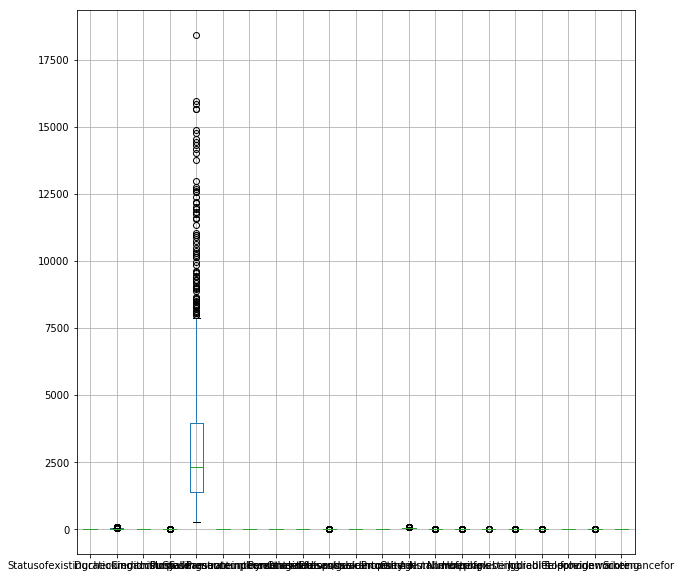

In [17]:
dataset.boxplot(figsize="10,10");

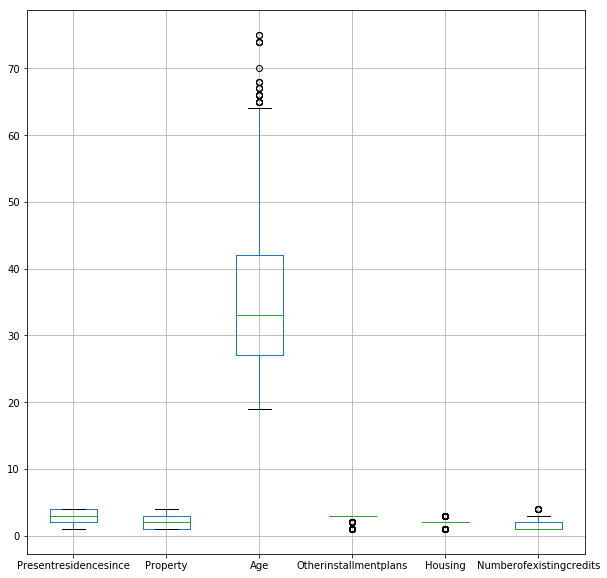

In [18]:
dataset.iloc[:,10:16].boxplot(figsize="10,10")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


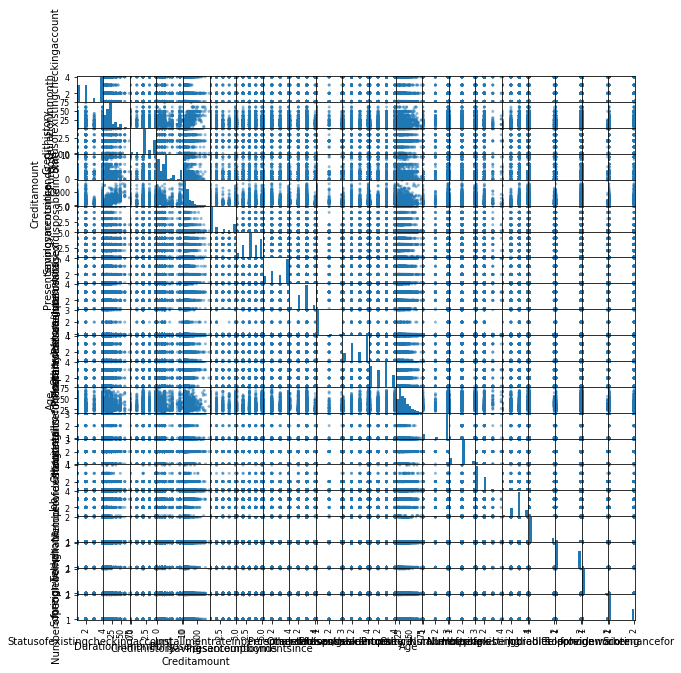

In [19]:
pd.scatter_matrix(dataset,figsize=(10,10));

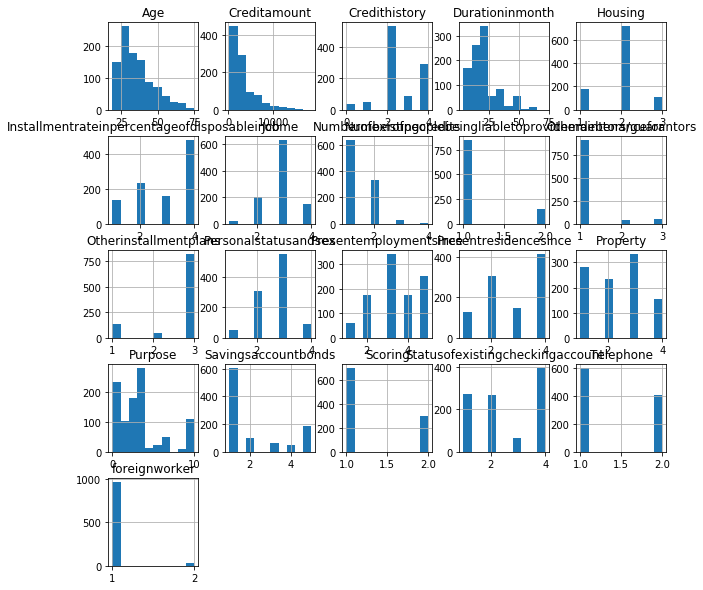

In [20]:
dataset.hist(figsize=(10,10));

In [21]:
dataset.corr()

,Statusofexistingcheckingaccount,Durationinmonth,Credithistory,Purpose,Creditamount,Savingsaccountbonds,Presentemploymentsince,Installmentrateinpercentageofdisposableincome,Personalstatusandsex,Otherdebtors/guarantors,...,Property,Age,Otherinstallmentplans,Housing,Numberofexistingcredits,Job,Numberofpeoplebeingliabletoprovidemaintenancefor,Telephone,foreignworker,Scoring
Statusofexistingcheckingaccount,1.000000,-0.072013,0.192191,0.028783,-0.042705,0.222867,0.106339,-0.005280,0.043261,-0.127737,...,-0.032260,0.059751,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,-0.026758,-0.350847
Durationinmonth,-0.072013,1.000000,-0.077186,0.147492,0.624984,0.047661,0.057381,0.074749,0.014789,-0.024490,...,0.303971,-0.036136,-0.054884,0.157049,-0.011284,0.210910,-0.023834,0.164718,-0.138196,0.214927
Credithistory,0.192191,-0.077186,1.000000,-0.090336,-0.059905,0.039058,0.138225,0.044375,0.042171,-0.040676,...,-0.053777,0.147086,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,0.013873,-0.228785
Purpose,0.028783,0.147492,-0.090336,1.000000,0.068474,-0.018684,0.016013,0.048369,0.000157,-0.017607,...,0.010966,0.001312,-0.096612,0.018391,0.054935,0.008085,-0.032577,0.078371,-0.099725,0.017979
Creditamount,-0.042705,0.624984,-0.059905,0.068474,1.000000,0.064630,-0.008367,-0.271316,-0.016091,-0.027832,...,0.311599,0.032716,-0.046008,0.135632,0.020795,0.285385,0.017142,0.276995,-0.050050,0.154739
Savingsaccountbonds,0.222867,0.047661,0.039058,-0.018684,0.064630,1.000000,0.120950,0.021993,0.017349,-0.105069,...,0.018948,0.084245,0.001908,0.006505,-0.021644,0.011709,0.027514,0.087208,0.007095,-0.178943
Presentemploymentsince,0.106339,0.057381,0.138225,0.016013,-0.008367,0.120950,1.000000,0.126161,0.111278,-0.008116,...,0.087187,0.256227,-0.040154,0.111126,0.125791,0.101225,0.097192,0.060518,-0.027232,-0.116002
Installmentrateinpercentageofdisposableincome,-0.005280,0.074749,0.044375,0.048369,-0.271316,0.021993,0.126161,1.000000,0.119308,-0.011398,...,0.053391,0.058266,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,-0.090024,0.072404
Personalstatusandsex,0.043261,0.014789,0.042171,0.000157,-0.016091,0.017349,0.111278,0.119308,1.000000,0.050634,...,-0.006940,0.007783,-0.036765,0.099579,0.064672,-0.011956,0.122165,0.027275,0.065618,-0.088184
Otherdebtors/guarantors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027832,-0.105069,-0.008116,-0.011398,0.050634,1.000000,...,-0.155450,-0.029873,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,0.117999,-0.025137


No handles with labels found to put in legend.


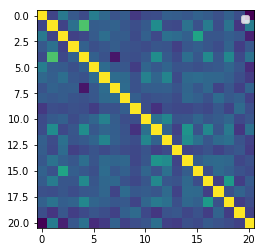

In [22]:
plt.imshow(dataset.corr());
plt.legend()


dataset.bays()
dataset.values()
dataset.indexes()

## Passage de pandas vers numpy

In [46]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

In [47]:
X.shape

(1000, 20)

In [48]:
y.shape

(1000,)

In [49]:
y=y.reshape(1000,1)

In [50]:
print(type(X))

<class 'numpy.ndarray'>


## preprocessing:
### on utilisera standardscaler

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc=sc.fit_transform(X)
y_sc=sc.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc = train_test_split(X_sc,test_size=0.2,random_state=0)

In [54]:
print(X_sc.shape)
print(y_sc.shape)
print(X_train_sc.shape)
print(X_test_sc.shape)

(1000, 20)
(1000, 1)
(800, 20)
(200, 20)


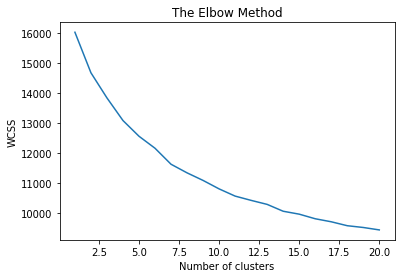

In [55]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_train_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,random_state=0)
y_kmeans=model.fit_predict(X_train_sc)

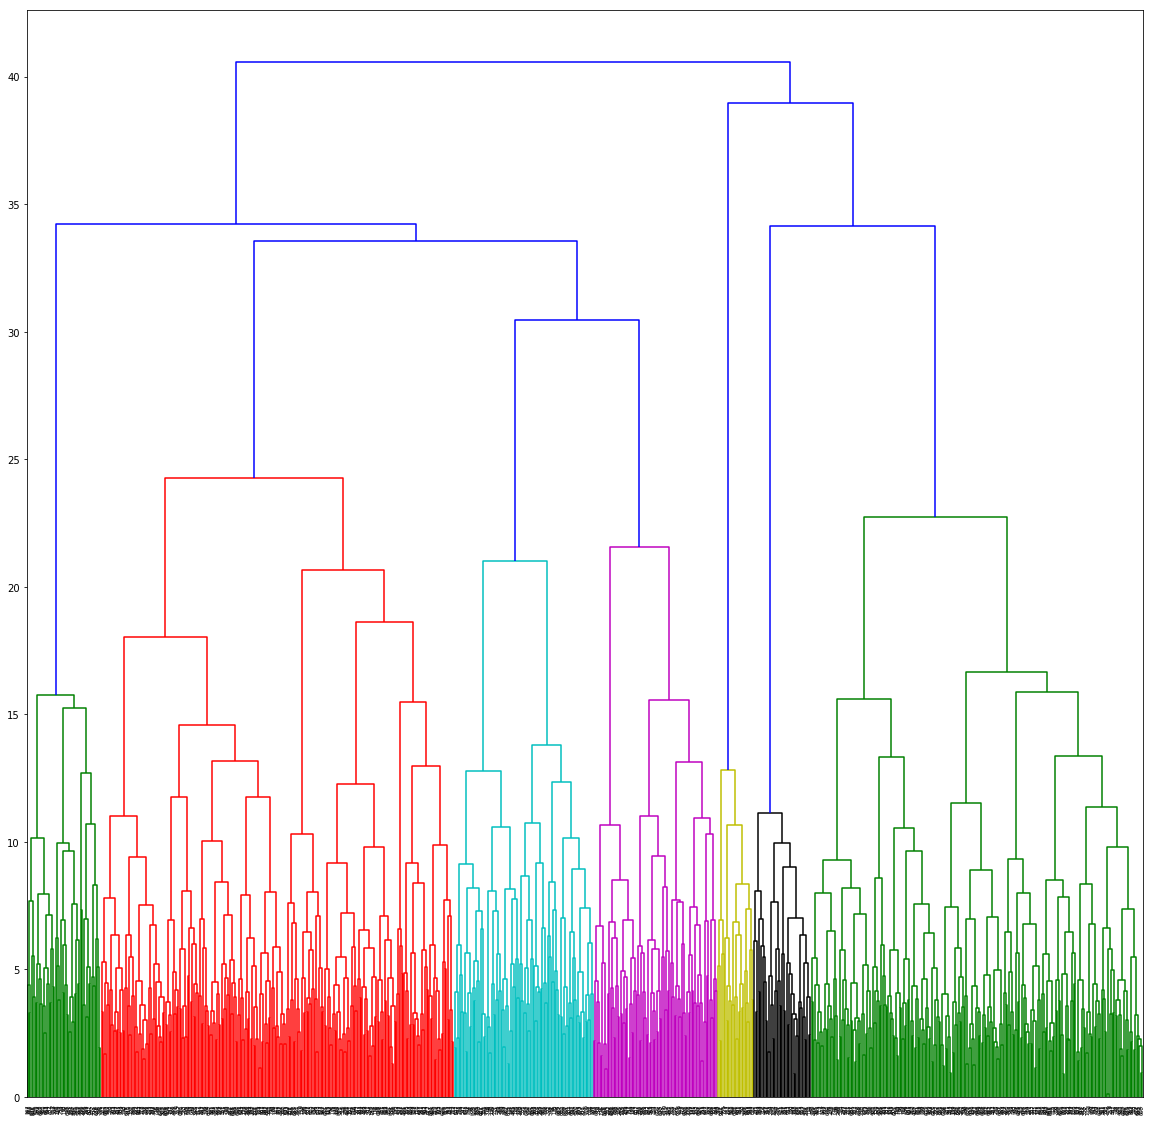

In [58]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(X_train_sc,method="ward"))
plt.show()

### Vu le nombre de variables on ne peut pas avoir une bonne classification od'ou la necessité d'utiliser PCA 

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_red=pca.fit_transform(X)

In [67]:
X_red.shape

(1000, 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_red_sc=sc.fit_transform(X_red)
y_red_sc=sc.fit_transform(y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
from sklearn.model_selection import train_test_split
X_train_red_sc, X_test_red_sc = train_test_split(X_red_sc,test_size=0.2,random_state=0)

In [70]:
X_train_red_sc[:3,:]

array([[-0.14504375, -0.71959163, -1.59355376, -1.30513479,  0.07345061],
       [-0.05254629, -0.7965767 , -0.19023661, -1.06666801, -1.15324523],
       [ 1.46626661, -1.48531623, -2.70071495, -1.5630708 , -0.39591199]])

In [85]:
#acp choisit selon les variances : la variablilité de la variable aléatoire

In [71]:
acp.explained_variance_

array([2.56004712, 1.96745919, 1.41569576, 1.34345302, 1.19271977])

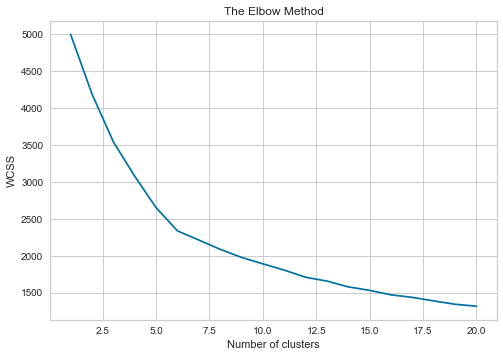

In [74]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X_red_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,21), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,random_state=0)
y_kmeans=model.fit_predict(X_train_red_sc)

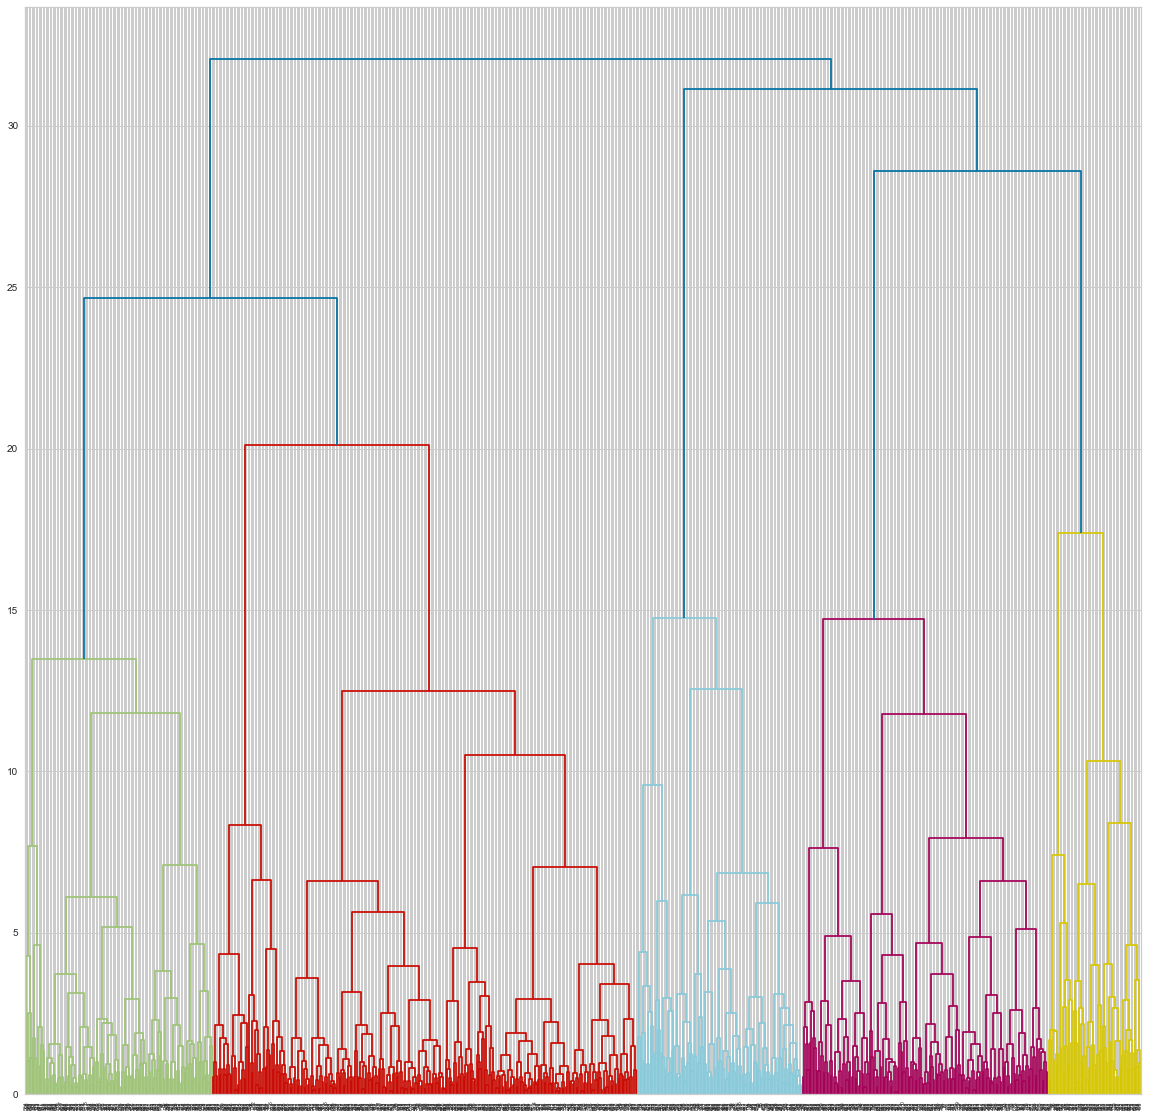

In [80]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(X_train_red_sc,method="ward"))
plt.show()

## Classification

In [81]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values

In [82]:
from sklearn.decomposition import PCA
acp= PCA(n_components=2)
X_acp=acp.fit_transform(X)

In [83]:
sum(acp.explained_variance_ratio_)

0.9999865584603426

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_acp,y,test_size=0.2,random_state=0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)  
X_test=sc.transform(X_test)

In [86]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred = classifier_SVC.predict(X_test)

In [88]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [89]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1], dtype=int64)

In [90]:
sum(y_test == y_pred)/200

0.725

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[138,   4],
       [ 51,   7]], dtype=int64)

In [92]:
classifier_SVC.score(X_train,y_train)

0.7125

In [93]:
classifier_SVC.score(X_test,y_test)

0.725